# Predicting Ratings of Cereal Brands Based on Nutrition Information

## Introduction

Manafacturers aim to produce cereals that will cater to their consumers, promoting good flavours or healthy bites, or both! When it comes to "healthy", consumers often check the nutrition label of a cereal, favouring those with lower calories while still hoping for some flavor from sodium and sugar. 
As of January 2024, 6 new cereals have launched:
+ Trix with marshmallows
+ Maple Cinnamon Cheerios Hearty Nut Medley
+ Honey Nut Cheerios Minis
+ Lucky Charms Berry Swirl
+ Reese’s Puffs Peanut Butter Lovers, and
+ Nature Valley French Vanilla Protein Granola.

This project aims to predict the ratings, or popularity, of these new cereals.

The dataset used can be found here: https://www.kaggle.com/datasets/crawford/80-cereals?resource=download

It contains the names of 77 cereal brands (not including the above) and information commonly found on nutrition labels such as calories, sugar and protein. To access the dataset, there is a button to download the file on the website, after which the file should be opened and saved as a .xlsx file and imported into JupyterHub under a new folder in the working directory. Name this folder "data".

## Preliminary Exploratory Data Analysis:

In [8]:
library(tidyverse)
library(readxl)
library(ggplot2)
library(dplyr)

Demonstrating that the dataset can be read from the web into R,

### Table 1

In [9]:
cereal <- read_excel("data/cereal.xlsx")
cereal

name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.40297
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.98368
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.42551
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.70491
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.38484
Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.50954
Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.17409
Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.03856
Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.12025


From the above table, the dataset is already in a tidy format. Below, we select only the rows that have to do with nutrition information and ratings. The column, "name", is kept for ease of identification but will not be useful in any coding later on.

### Table 2

In [10]:
new_cereal <- cereal |>
    select(name, calories, protein, fat, sodium, fiber, carbo, sugars, potass, rating) |>
    arrange(rating)
new_cereal

name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,rating
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cap'n'Crunch,120,1,2,220,0.0,12.0,12,35,18.04285
Cinnamon Toast Crunch,120,1,3,210,0.0,13.0,9,45,19.82357
Honey Graham Ohs,120,1,2,220,1.0,12.0,11,45,21.87129
Count Chocula,110,1,1,180,0.0,12.0,13,65,22.39651
Cocoa Puffs,110,1,1,180,0.0,12.0,13,55,22.73645
Golden Grahams,110,1,1,280,0.0,15.0,9,45,23.80404
Lucky Charms,110,2,1,180,0.0,12.0,12,55,26.73451
Trix,110,1,1,140,0.0,13.0,12,25,27.75330
Fruity Pebbles,110,1,1,135,0.0,13.0,12,25,28.02576


Summarizing the above data by finding the averages of all columns other than name and rating.

### Table 3

In [11]:
cereal_nutrition <- new_cereal |>
    select(calories:potass) |>
    map_df(mean)
cereal_nutrition

calories,protein,fat,sodium,fiber,carbo,sugars,potass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
106.8831,2.545455,1.012987,159.6753,2.151948,14.5974,6.922078,96.07792


Plotting each variable with ratings to identify trends,

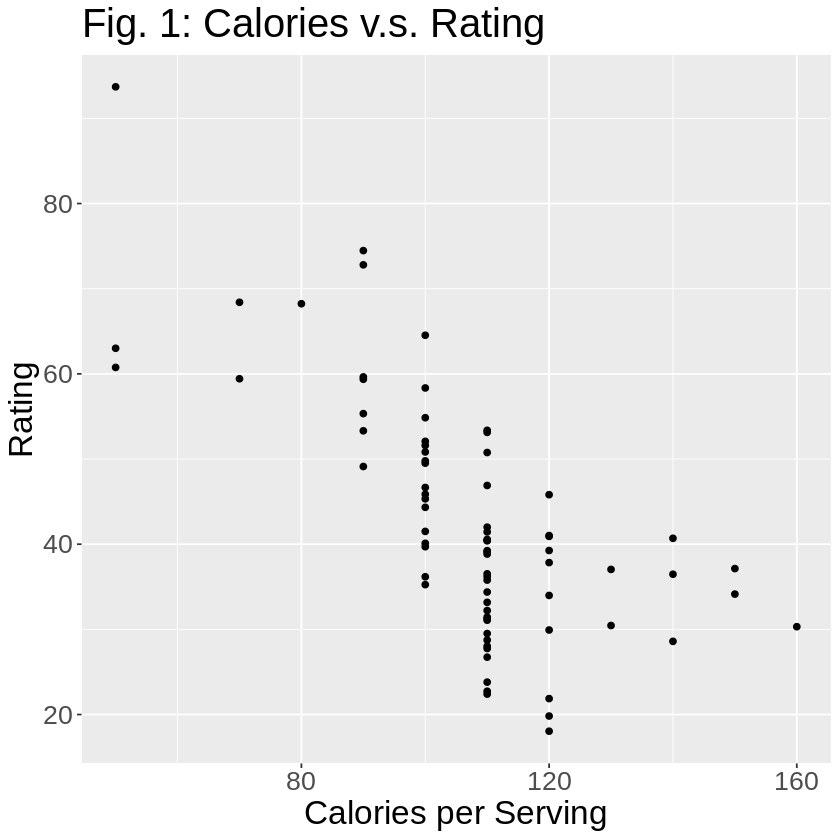

In [27]:
plot_calories <- new_cereal |>
    ggplot(aes(x = calories, y = rating)) +
    geom_point() +
    xlab("Calories per Serving")+
    ylab("Rating")+
    ggtitle("Fig. 1: Calories v.s. Rating")+
    theme(text = element_text(size = 20))
plot_calories

An overall decreasing trend in the first graph regarding calories per serving indicates that there is an inverse relationship between number of calories and overall approval.

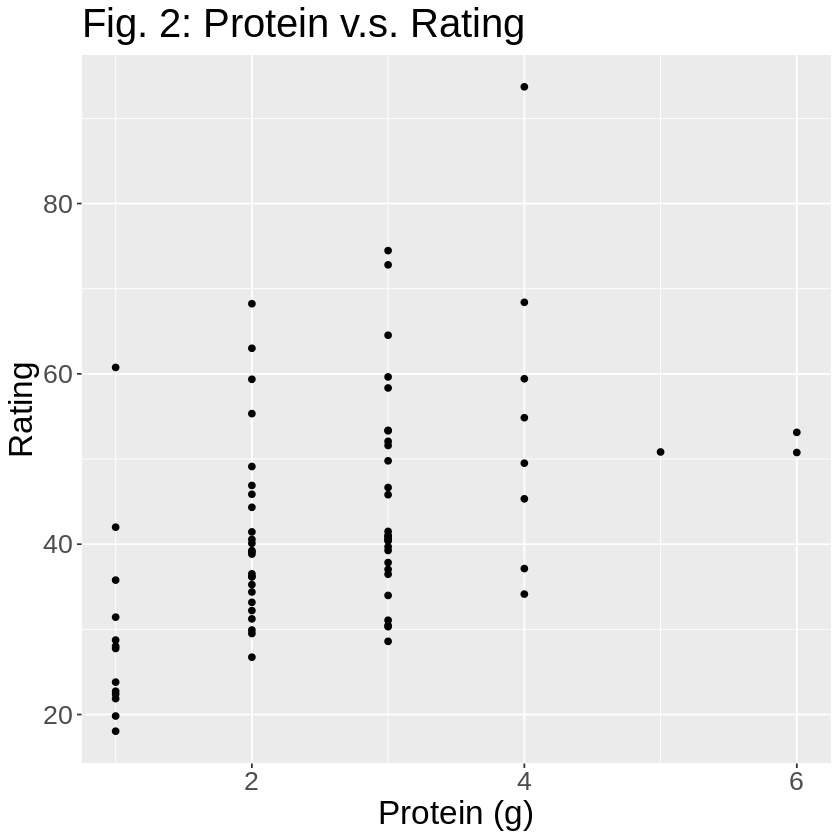

In [30]:
plot_protein <- new_cereal |>
    ggplot(aes(x = protein, y = rating)) +
    geom_point() +
    labs(title = "Fig. 2: Protein v.s. Rating", x = "Protein (g)", y = "Rating") +
    theme(text = element_text(size = 20))
plot_protein

While there may be few protein-rich cereals, there seems to be a positive trend between rating and amount of protein.

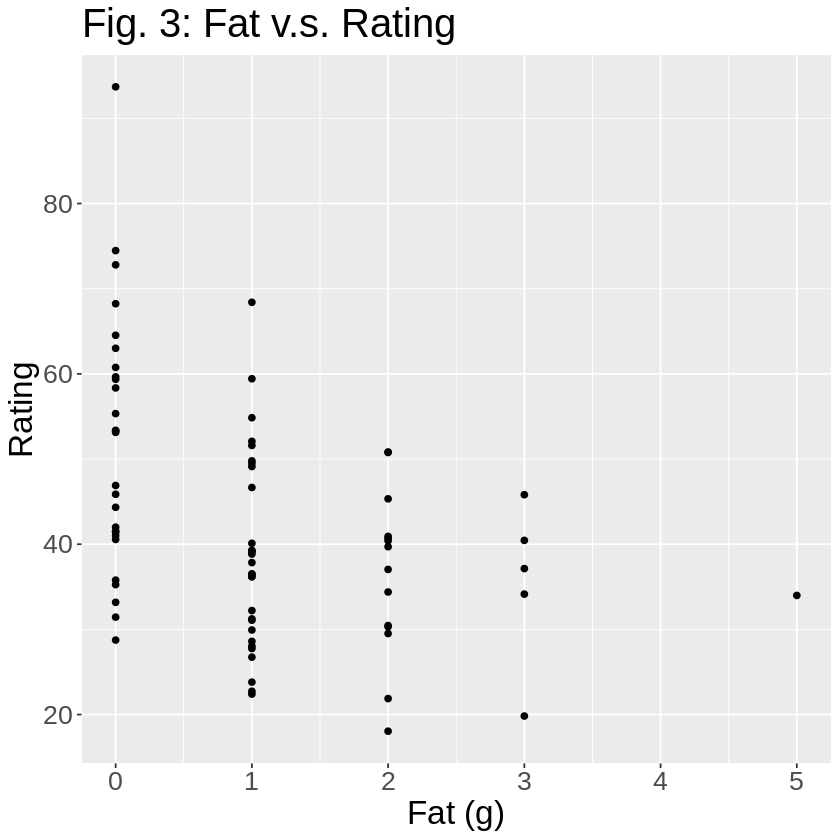

In [31]:
plot_fat <- new_cereal |>
    ggplot(aes(x = fat, y = rating)) +
    geom_point() +
    labs(title = "Fig. 3: Fat v.s. Rating", x = "Fat (g)", y = "Rating") +
    theme(text = element_text(size = 20))
plot_fat

A downwards trend indicates that an increase in fat corresponds to a decrease in overall rating. 

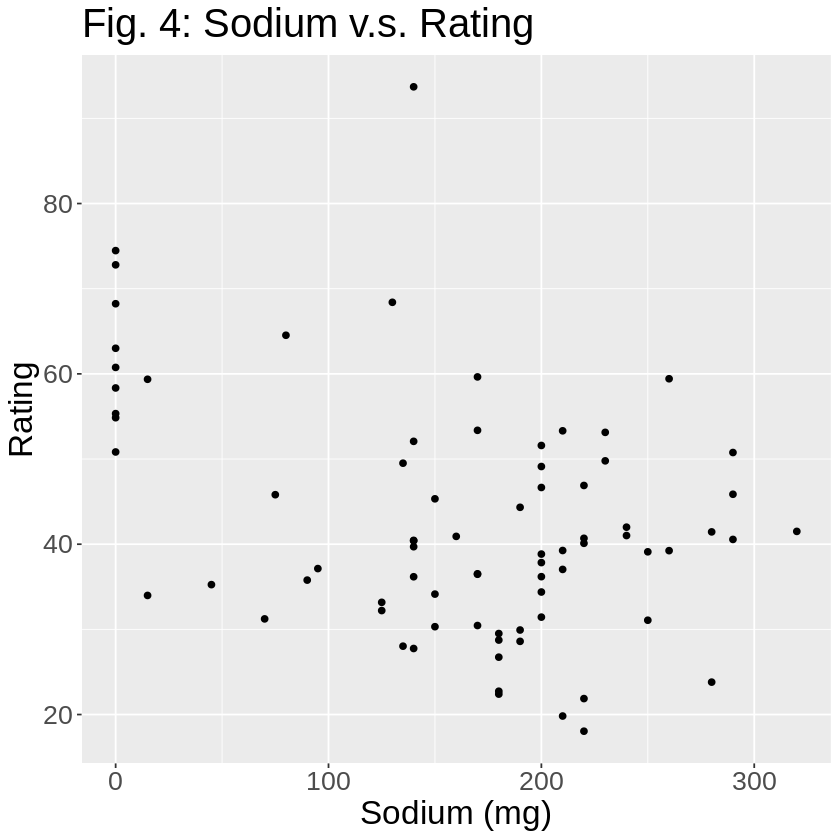

In [32]:
plot_sodium <- new_cereal |>
    ggplot(aes(x = sodium, y = rating)) +
    geom_point() +
    labs(title = "Fig. 4: Sodium v.s. Rating", x = "Sodium (mg)", y = "Rating") +
    theme(text = element_text(size = 20))
plot_sodium

There is no clear relationship between rating and sodium. 

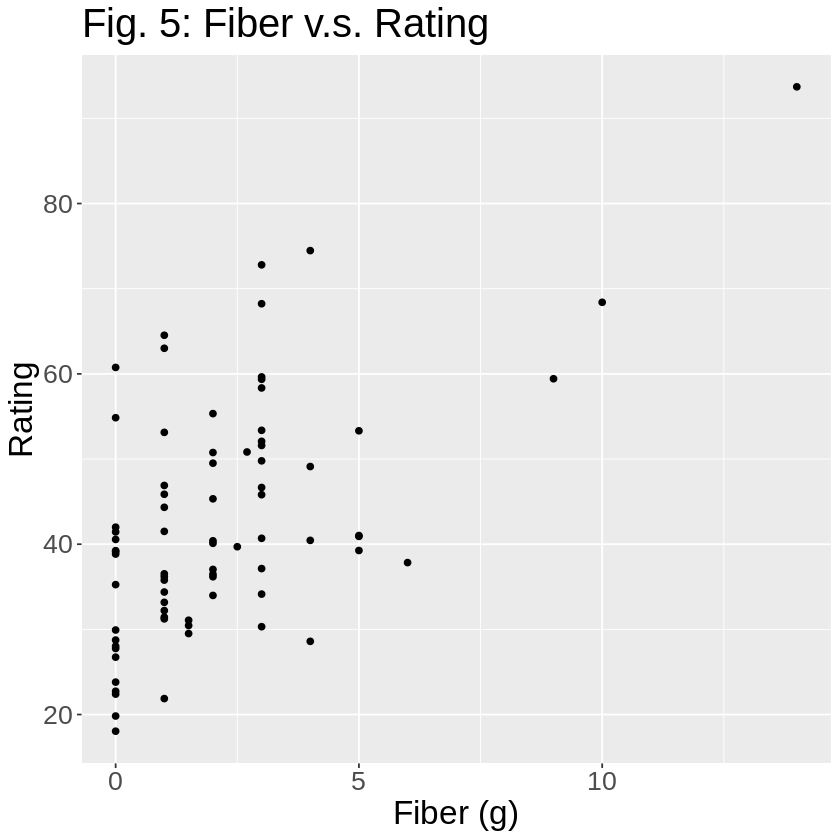

In [33]:
plot_fiber <- new_cereal |>
    ggplot(aes(x = fiber, y = rating)) +
    geom_point() +
    labs(title = "Fig. 5: Fiber v.s. Rating", x = "Fiber (g)", y = "Rating") +
    theme(text = element_text(size = 20))
plot_fiber

 While very few cereals are rich in fiber, it seems to correspond to a positive trend. 

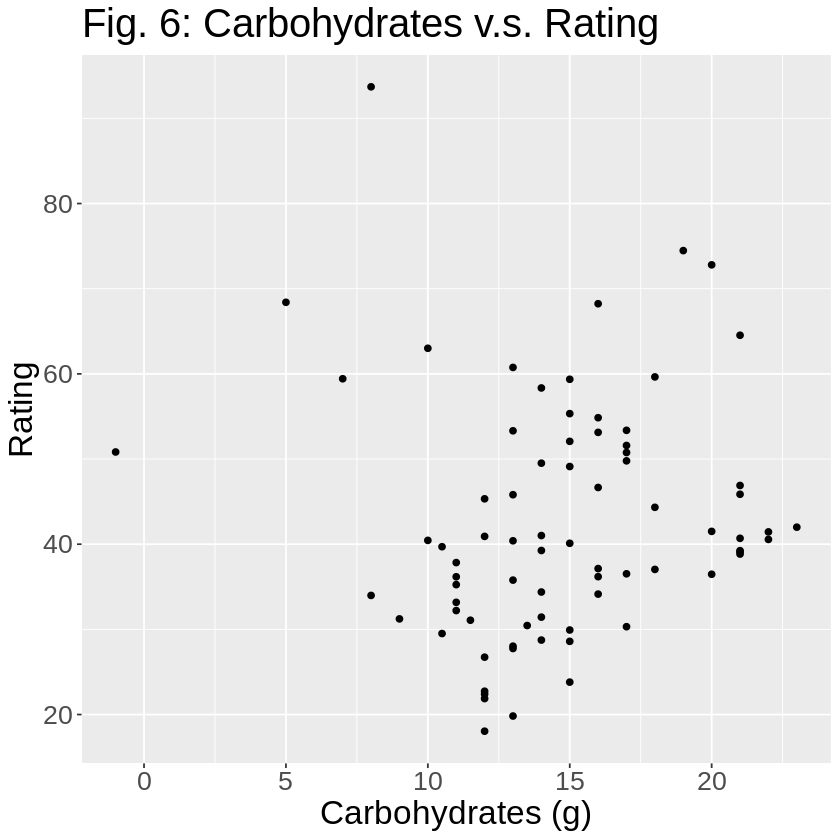

In [34]:
plot_carbo <- new_cereal |>
    ggplot(aes(x = carbo, y = rating)) +
    geom_point() +
    labs(title = "Fig. 6: Carbohydrates v.s. Rating", x = "Carbohydrates (g)", y = "Rating") +
    theme(text = element_text(size = 20))
plot_carbo

There seems to be no clear relationship between carbohydrates and rating.

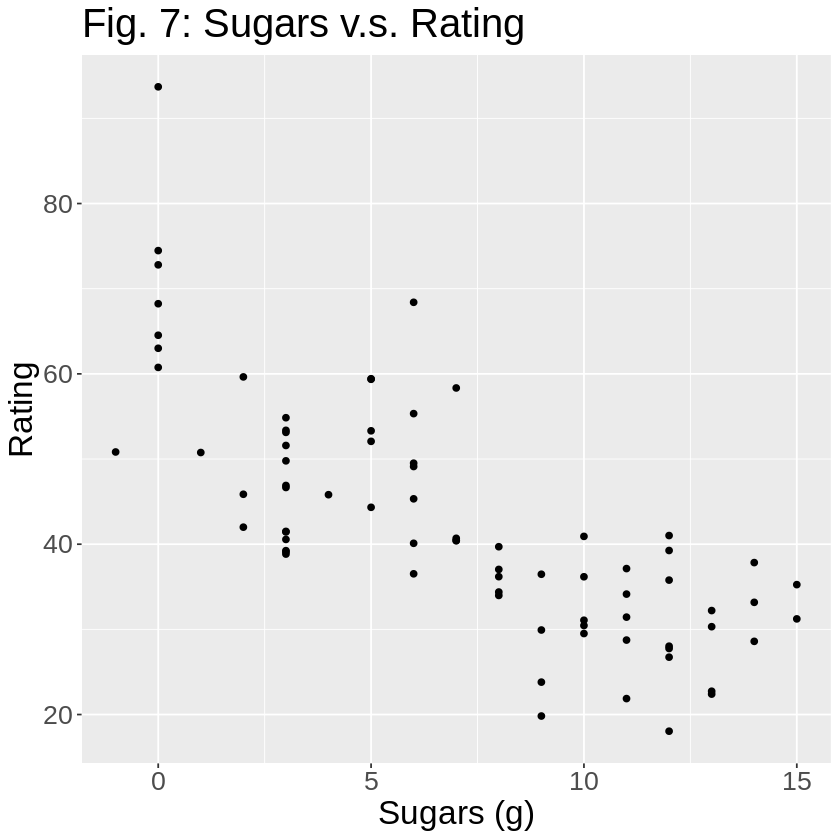

In [35]:
plot_sugars <- new_cereal |>
    ggplot(aes(x = sugars, y = rating)) +
    geom_point() +
    labs(title = "Fig. 7: Sugars v.s. Rating", x = "Sugars (g)", y = "Rating") +
    theme(text = element_text(size = 20))
plot_sugars

A decreasing trend indicates that higher sugar content is related to lower rating.

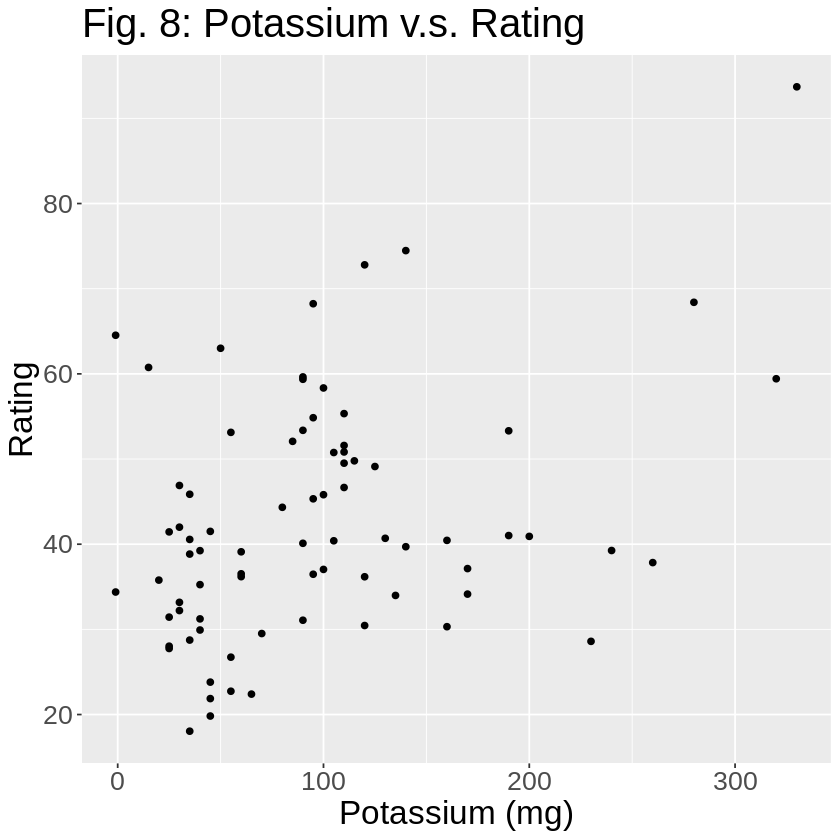

In [37]:
plot_potass <- new_cereal |>
    ggplot(aes(x = potass, y = rating)) +
    geom_point() +
    labs(title = "Fig. 8: Potassium v.s. Rating", x = "Potassium (mg)", y = "Rating") +
    theme(text = element_text(size = 20))
plot_potass

There may be a positive trend between potassium and rating. 

## Methods

Data was loaded from an openly available dataset and read using the tidymodel function read_excel. Then dataset was made more useful by selecting only variables investigated for their ability to predict rating. 

A model to predict ratings based on nutritional label values will be created using regression. We'll use predictors like "calories," "protein," "fat," "sodium," "fiber," "carbohydrates," "sugars," and "potassium," leaving out "vitamins," since its unit is a percentage instead of mass.

This project will be visualized using a set of scatter plots with individual predictors and ratings as axes. Every predictor in every plot will be used to calculate the expected rating for new observations.


We will use 5-fold cross-validation for the k-nearest neighbors (KNN) regression, using 75% of the dataset for training and the remaining 25% for testing. The range of the k values is 1 to 100.


## Expected Outcomes and Signficance

From the above plots, its expected that cereals will have higher ratings if they have:
+ lower calories, fat, sodium and sugar
+ higher fiber and potassium
+ masses of protein that are closer to a middle value

If the predictions of this model align with popularity polls across websites, such as Amazon reviews, manafacturers could plan their future cereal products based on nutritional contents. This project could lead to future questions about what consumers look for in cereal. Since this project analyzed cereal ratings based on nutritional value, another idea is to analyze ratings based on keywords, such as "fruit", "whole wheat", or any popular brand names (e.g. Cheerios, Frosted Flakes, etc.).

## Bibliography

Crawford, C. (2018). *80 Cereals* [Data set]. Kaggle. https://www.kaggle.com/datasets/crawford/80-cereals?
    resource=download.
    
*Six New General Mills Cereals for 2024*. (2023, December 11). Prepared Foods.
    https://www.preparedfoods.com/articles/128754-six-new-general-mills-cereals-for-2024.